# **Import Libraries**

In [1]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, LeakyReLU

# **Data Preparation**

## Import Dataset

In [2]:
train_dir = "D:/Hand_Gesture_Recognition_2/train"

training_data = []

def create_training_data():
    # List all folders (which are the labels)
    for folder in os.listdir(train_dir):
        folder_path = os.path.join(train_dir, folder)
        
        class_label = int(folder)  # Folder name is the label

        # Loop through all the images in the folder
        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            
            # Read the image in grayscale
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Check if the image is read correctly
            if img_array is not None:
                # Append the image and its label to the training data
                training_data.append([img_array, class_label])

    print(f'Total training images: {len(training_data)}')

# Call the function to create training data
create_training_data()

Total training images: 9900


In [3]:
test_dir = "D:/Hand_Gesture_Recognition_2/test"

test_data = []

def create_training_data():
    # List all folders (which are the labels)
    for folder in os.listdir(test_dir):
        folder_path = os.path.join(test_dir, folder)
        
        class_label = int(folder)  # Folder name is the label

        # Loop through all the images in the folder
        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            
            # Read the image in grayscale
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Check if the image is read correctly
            if img_array is not None:
                # Append the image and its label to the training data
                test_data.append([img_array, class_label])

    print(f'Total test images: {len(test_data)}')

# Call the function to create training data
create_training_data()

Total test images: 3300


## Displaying Images

Displaying 3 random images for class: 0


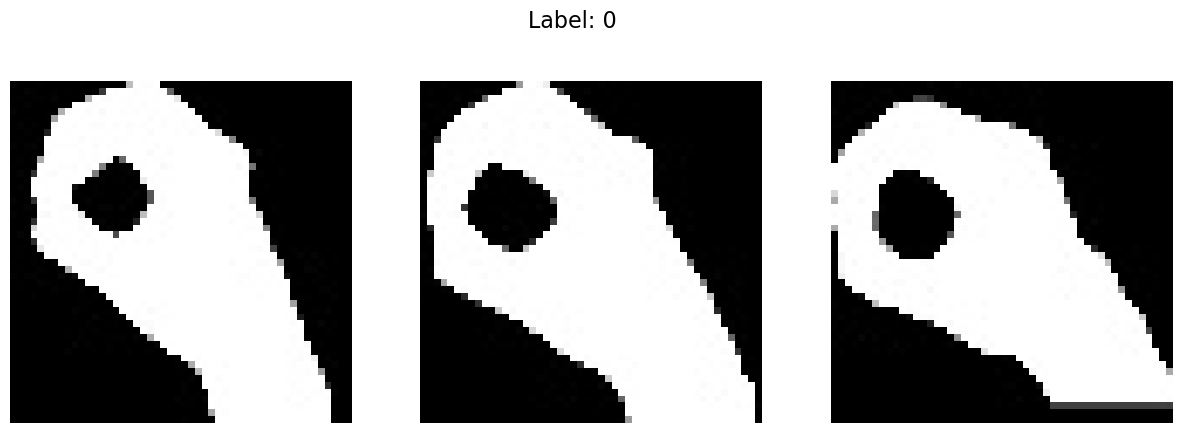

Displaying 3 random images for class: 1


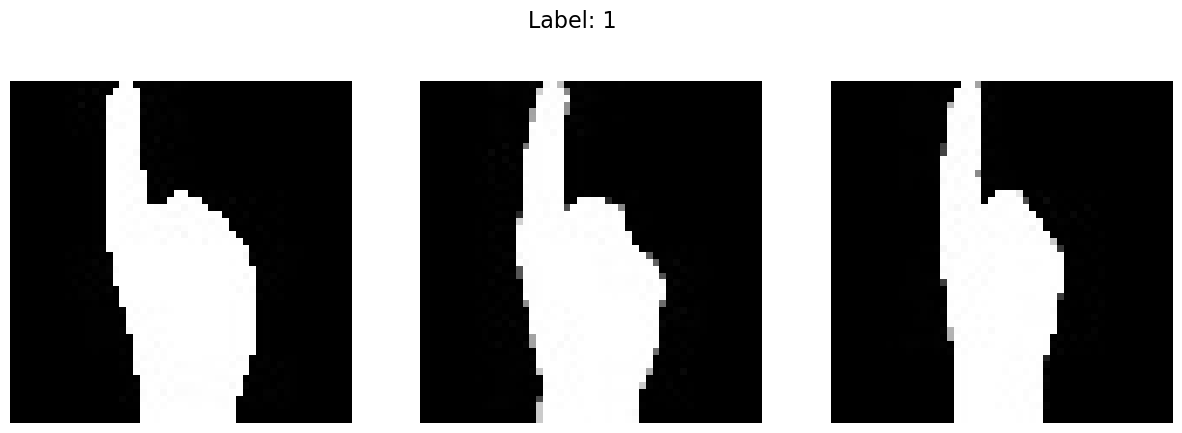

Displaying 3 random images for class: 10


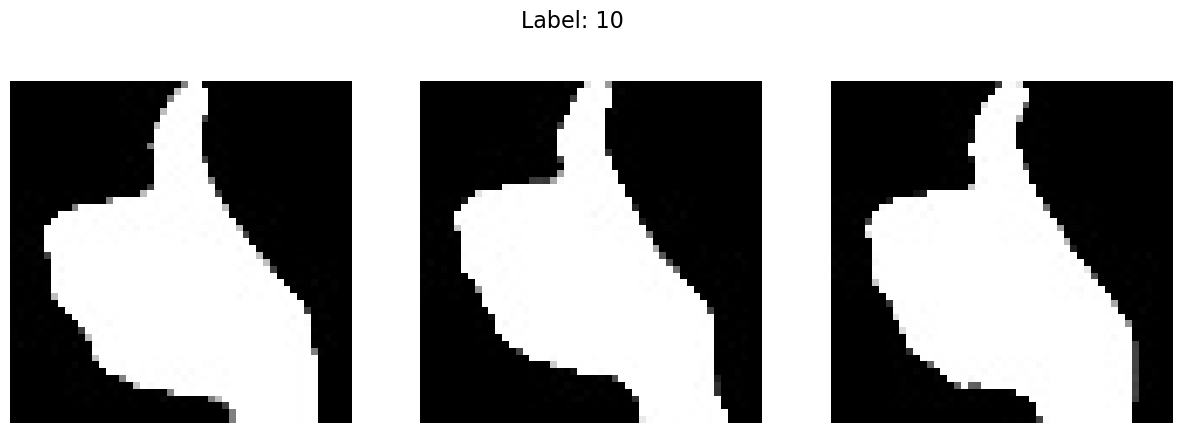

Displaying 3 random images for class: 2


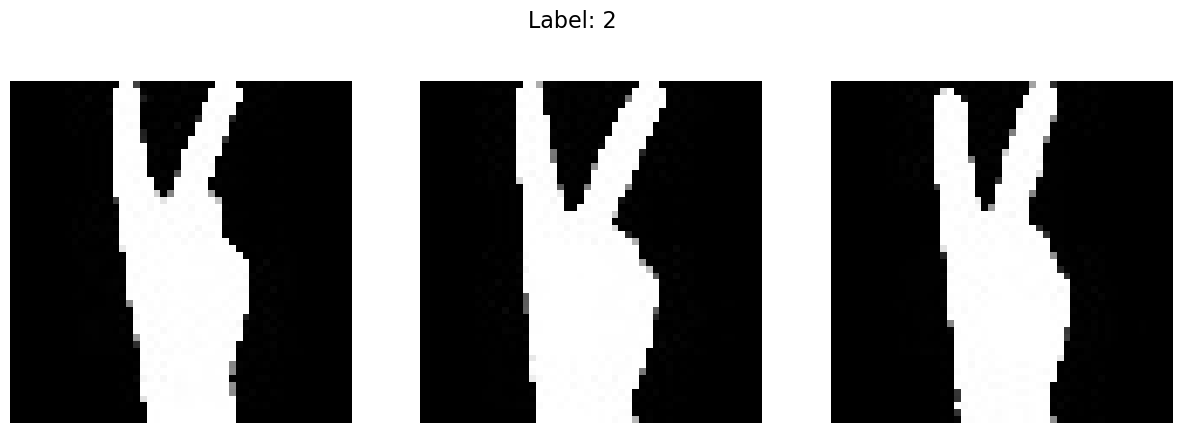

Displaying 3 random images for class: 3


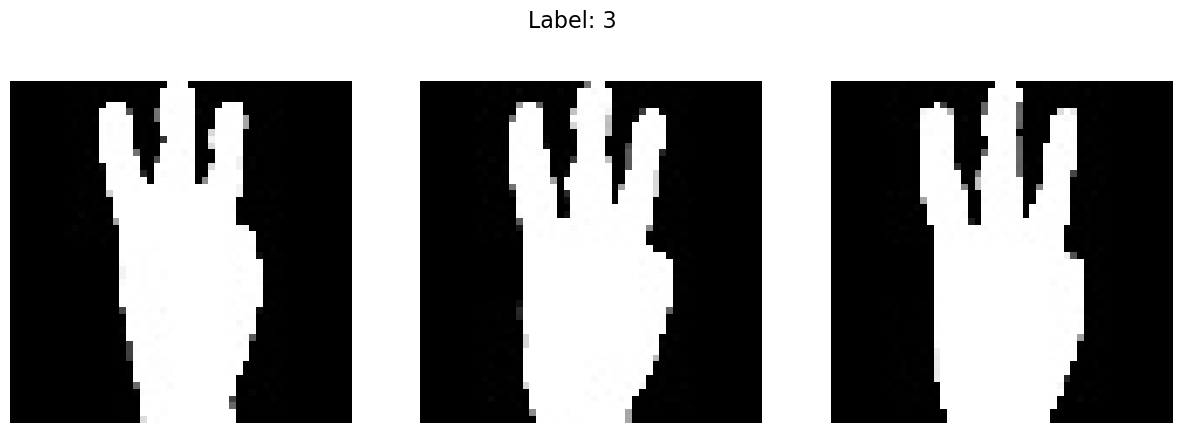

Displaying 3 random images for class: 4


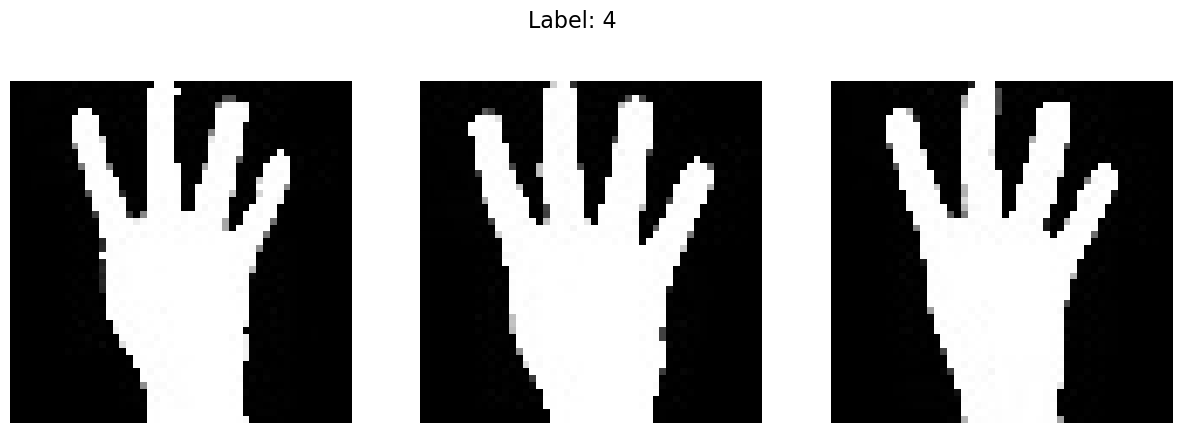

Displaying 3 random images for class: 5


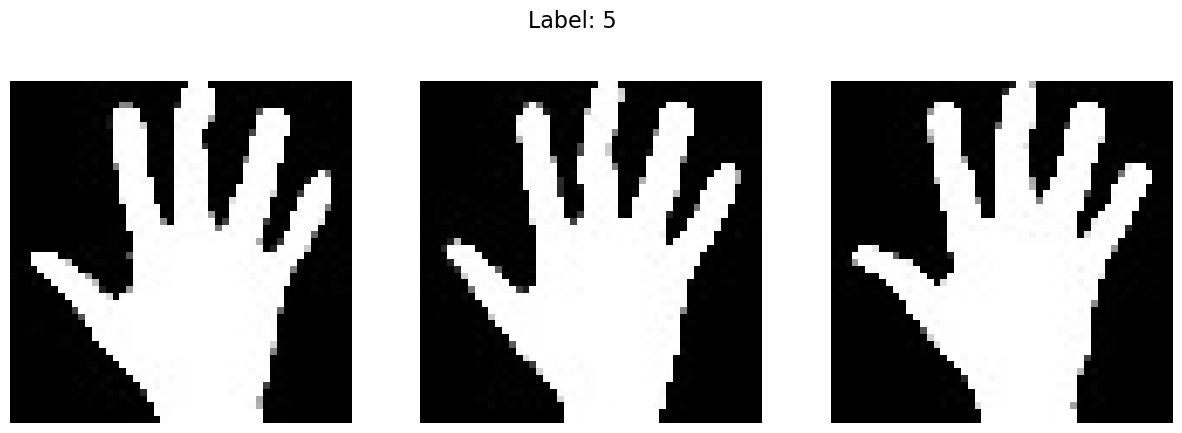

Displaying 3 random images for class: 6


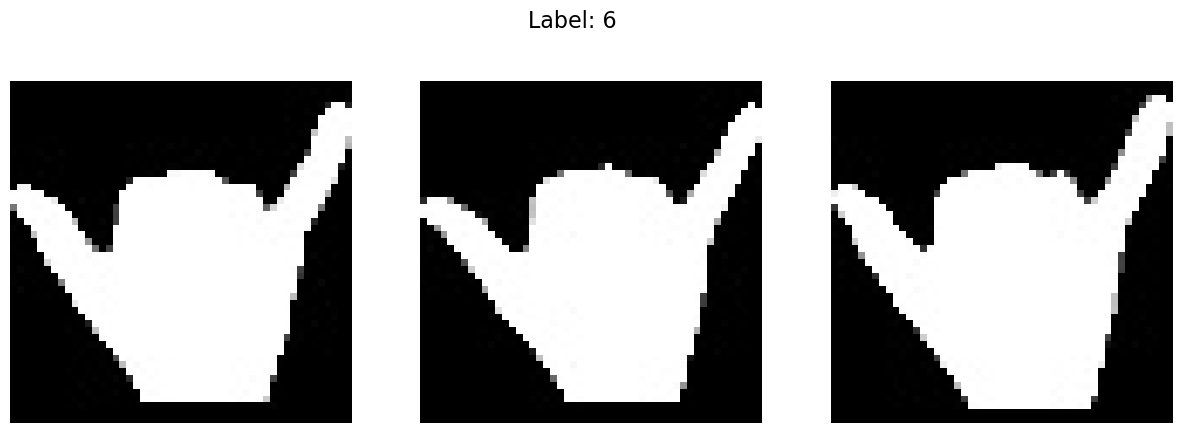

Displaying 3 random images for class: 7


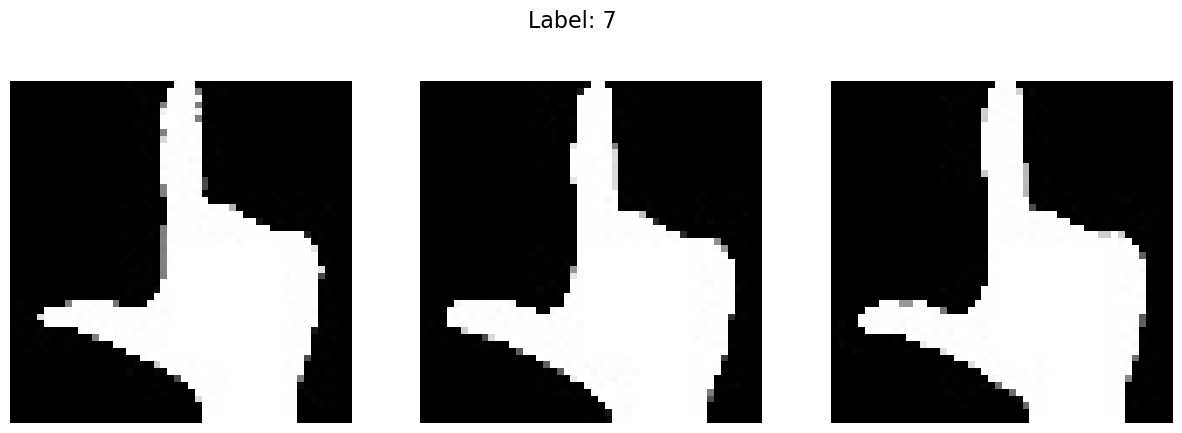

Displaying 3 random images for class: 8


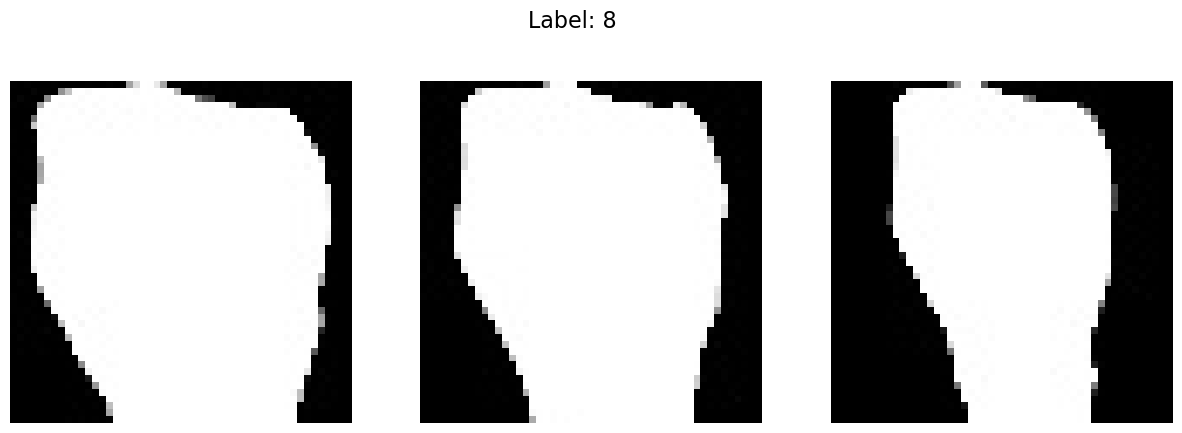

Displaying 3 random images for class: 9


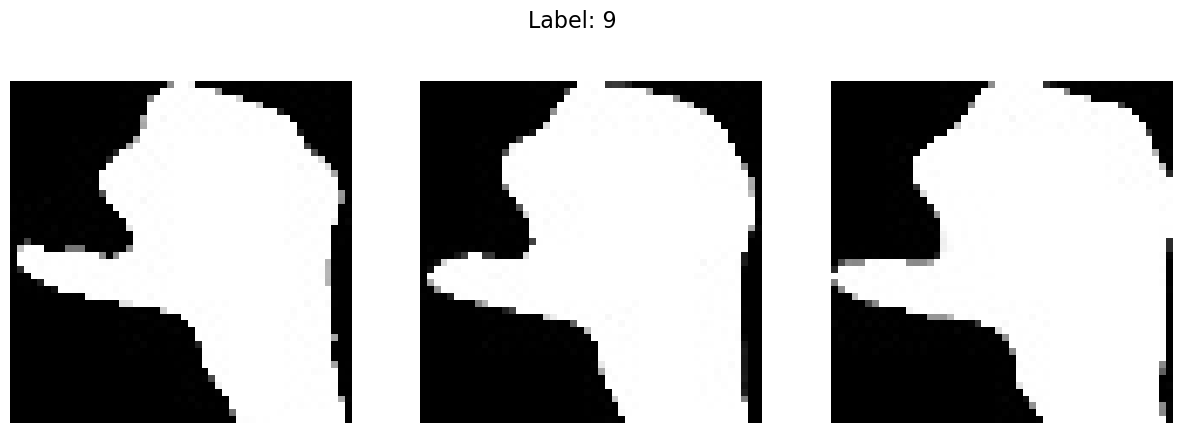

In [4]:
def show_images(images, label):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(f'Label: {label}', fontsize=16)

    for i, img in enumerate(images):
        axs[i].imshow(img, cmap='gray')  # Display the image in grayscale
        axs[i].axis('off') 
    plt.show()

# Group the images by their class labels
label_to_images = {}

for img_array, label in training_data:
    if label not in label_to_images:
        label_to_images[label] = []
    label_to_images[label].append(img_array)

# Loop through each label and display num_images random images in a row
for label, images in label_to_images.items():
    print(f"Displaying 3 random images for class: {label}")
    selected_images = random.sample(images, 3)
    show_images(selected_images, label)

## Size of Images

In [5]:
first_image_size = training_data[0][0].shape
print(f"Size of image: {first_image_size}")

# Initialize a flag to track if all sizes match
all_same_size = True

# Iterate over all the images in training_data
for img_array, label in training_data:
    if img_array.shape != first_image_size:
        print(f"Image from label {label} has a different size: {img_array.shape}")
        all_same_size = False

# Output the result
if all_same_size:
    print("All images have the same size.")
else:
    print("Some images have different sizes.")

Size of image: (50, 50)
All images have the same size.


## Shuffling

In [6]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [7]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 9900 : 9
Class number for image 9899 : 9
Class number for image 9898 : 9
Class number for image 9897 : 9
Class number for image 9896 : 9


In [8]:
random.shuffle(training_data)

for i in range(7):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 0 

Sample 2:
Class number: 1 

Sample 3:
Class number: 8 

Sample 4:
Class number: 8 

Sample 5:
Class number: 4 

Sample 6:
Class number: 7 

Sample 7:
Class number: 5 



## Preprocessing

#### Training + Validation Set

In [19]:
X = []
y = []

for i, (feature, label) in enumerate(training_data):
    X.append(feature) 
    y.append(label)

X = np.stack(X) 
y = np.array(y)  

print(X.shape) 
print(y.shape)

(9900, 50, 50)
(9900,)


In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=11)
y_valid = to_categorical(y_valid, num_classes=11)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(7920, 50, 50)
(7920, 11)
(1980, 50, 50)
(1980, 11)


#### Test Set

In [21]:
X_test = []
y_test = []

for i, (feature, label) in enumerate(test_data):
    X_test.append(feature)
    y_test.append(label)

X_test = np.stack(X_test)
y_test = np.array(y_test)
y_test = to_categorical(y_test, num_classes=11)

print(X_test.shape)  
print(y_test.shape)

(3300, 50, 50)
(3300, 11)


# **Training Model**

In [22]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(50, 50, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                   

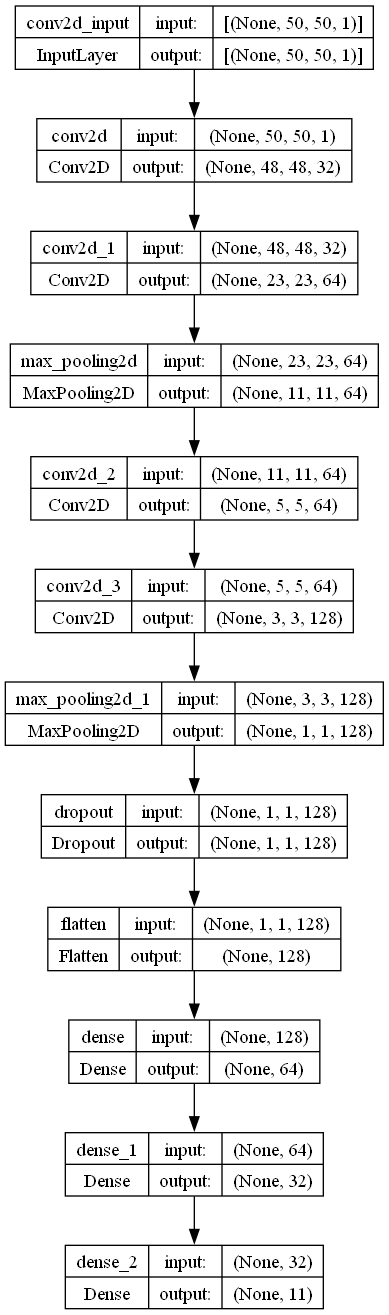

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [25]:
h = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=20, batch_size=32, verbose=1,
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='auto'), 
          keras.callbacks.ModelCheckpoint('explo/model_{val_loss:.3f}.h5', save_best_only = True, save_weights_only=False, monitor='val_loss')])
model.save('best_model.h5')

Epoch 1/20
248/248 [==============================] - 13s 48ms/step - loss: 0.4070 - accuracy: 0.9242 - val_loss: 9.1458e-05 - val_accuracy: 1.0000
Epoch 2/20
  3/248 [..............................] - ETA: 11s - loss: 6.4067e-04 - accuracy: 1.0000

C:\Users\Phuoc Le\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 [==============================] - 12s 49ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 5.8104e-04 - val_accuracy: 1.0000
Epoch 3/20
248/248 [==============================] - 13s 54ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 3.5963e-06 - val_accuracy: 1.0000
Epoch 4/20
248/248 [==============================] - 13s 54ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 4.6072e-05 - val_accuracy: 1.0000
Epoch 5/20
248/248 [==============================] - 13s 52ms/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 1.3087e-06 - val_accuracy: 1.0000
Epoch 6/20
248/248 [==============================] - 13s 52ms/step - loss: 2.5297e-04 - accuracy: 1.0000 - val_loss: 8.5169e-07 - val_accuracy: 1.0000
Epoch 7/20
248/248 [==============================] - 13s 52ms/step - loss: 0.0123 - accuracy: 0.9973 - val_loss: 4.4025e-05 - val_accuracy: 1.0000
Epoch 8/20
248/248 [==============================] - 14s 55ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 2.737

In [26]:
## Loading the saved model
from keras.models import load_model
model = load_model('best_model.h5')

In [27]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

104/104 [==============================] - 1s 12ms/step - loss: 4.5270e-06 - accuracy: 1.0000


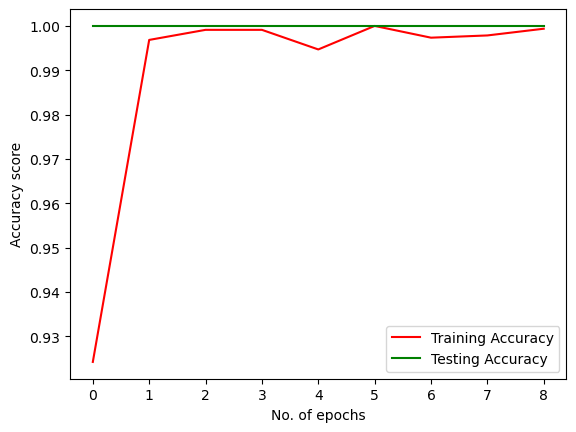

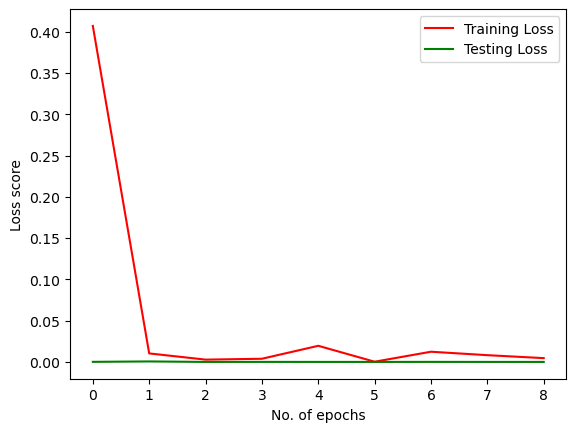

In [28]:
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu))

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(X_test)

104/104 [==============================] - 2s 13ms/step


In [31]:
from sklearn.metrics import classification_report

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(11)])

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       300
          10       1.00      1.00      1.00       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [32]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_mat)

[[300   0   0   0   0   0   0   0   0   0   0]
 [  0 300   0   0   0   0   0   0   0   0   0]
 [  0   0 300   0   0   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0   0]
 [  0   0   0   0 300   0   0   0   0   0   0]
 [  0   0   0   0   0 300   0   0   0   0   0]
 [  0   0   0   0   0   0 300   0   0   0   0]
 [  0   0   0   0   0   0   0 300   0   0   0]
 [  0   0   0   0   0   0   0   0 300   0   0]
 [  0   0   0   0   0   0   0   0   0 300   0]
 [  0   0   0   0   0   0   0   0   0   0 300]]


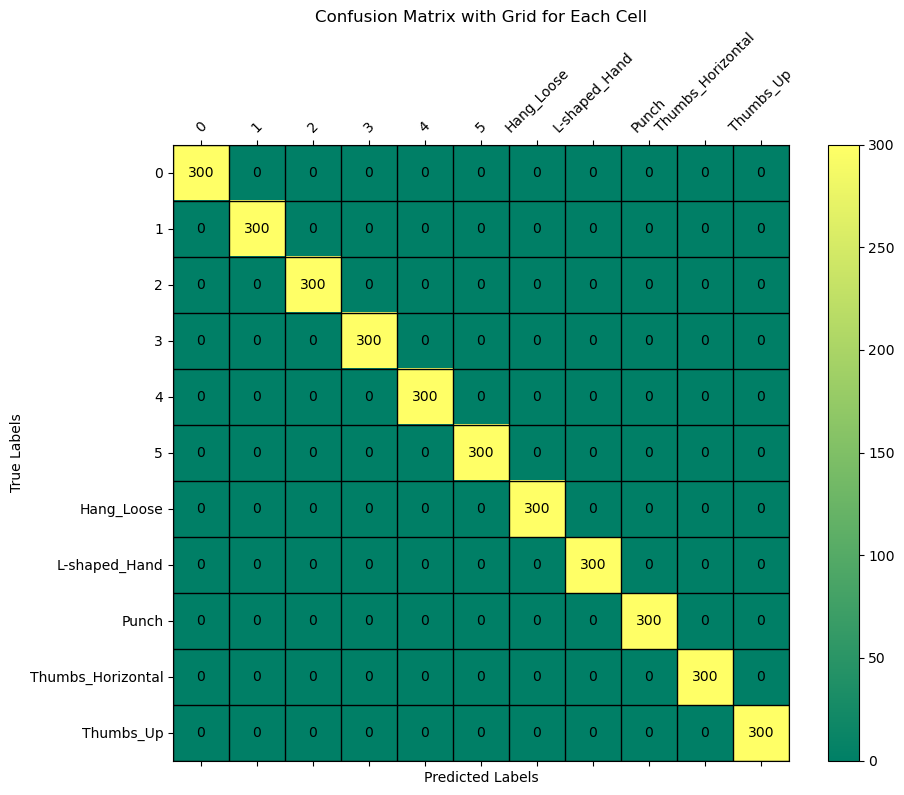

In [44]:
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(conf_mat, cmap='summer')

plt.colorbar(cax)

class_labels = ['0', '1', '2', '3', '4', '5', 'Hang_Loose', 'L-shaped_Hand', 'Punch', 'Thumbs_Horizontal', 'Thumbs_Up']
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, str(conf_mat[i, j]), va='center', ha='center', color='black')

ax.set_xticks(np.arange(conf_mat.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(conf_mat.shape[0]+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", size=0)

plt.title('Confusion Matrix with Grid for Each Cell')
plt.show()